## Recurrent Neural Network (RNN)

In [2]:
# Importing libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Change directory

os.chdir('//Users/mareksturek/Documents/GitHub/deep-learning/data')

In [5]:
# Importing the training set

dataset_train = pd.read_csv('rnn/rawgooglestockpricetrain.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [6]:
# Feature scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
# Creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
# Reshaping

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
# Building and training the RNN

#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
# Initialising the RNN

regressor = Sequential()

In [11]:
# Adding the first LSTM layer and some dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [12]:
# Adding a second LSTM layer and some dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# Adding a third LSTM layer and some dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
# Adding a fourth LSTM layer and some dropout regularisation

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [15]:
# Adding the output layer

regressor.add(Dense(units = 1))

In [16]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
# Fitting the RNN to the training set

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0406
Epoch 2/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0038
Epoch 13/100
38/38

In [18]:
# Making the predictions and visualising the results

dataset_test = pd.read_csv('rnn/rawgooglestockpricetest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
# Getting the predicted stock price of 2017

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

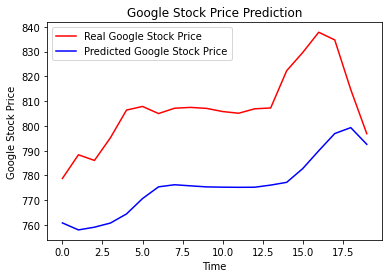

In [20]:
# Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()